In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titles = pd.read_csv('/content/titles.csv', header=None)
dictionary = pd.read_csv('/content/dictionary.csv', header=None)
histograms = np.loadtxt('/content/wikipedia_td.txt')

histograms = histograms / np.sum(histograms, axis=0)

Best fitness for PSO with 100 iterations: 43.26493258017474
Cluster 1 - Top 10 Words:
['lead', 'american', 'appear', 'live', 'base', 'announce', 'result', 'article', 'city', 'feature']

Cluster 1 - Top 10 Titles:
['Unfinished_portrait_of_Franklin_D._Roosevelt', 'Beyonce', 'Rodrigo_Duterte', 'The_Life_of_Pablo', 'Memorial_Day', 'Veterans_Day', 'The_Martian_(film)', 'David_Bowie', 'Whitey_Bulger', 'Chris_Stapleton']

-----------------------------

Cluster 2 - Top 10 Words:
['eventually', 'career', 'originally', 'view']

Cluster 2 - Top 10 Titles:
['Rai_stones', 'Martin_Luther_King,_Jr.', 'Dmitri_Mendeleev', 'Martin_Luther_King,_Jr._Day']

-----------------------------

Cluster 3 - Top 10 Words:
['play', 'list', 'million', 'school', 'john', 'national', 'date', 'medium', 'critic', 'local']

Cluster 3 - Top 10 Titles:
['Cam_Newton', 'Ides_of_March', 'Meldonium', 'Negasonic_Teenage_Warhead', 'Von_Miller', 'Prince_(musician)', 'Zika_virus', 'Singh_Is_Bliing', 'Samburu_people', 'Rob_Ford']

--

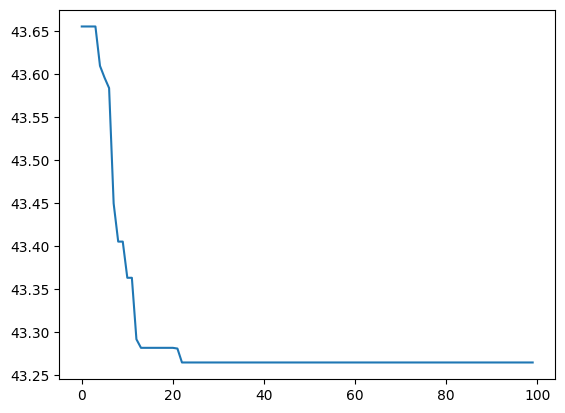

In [ ]:
def print_top_words_titles_per_cluster(assignments, titles, dictionary, top_n=10):
    for cluster_id in range(len(np.unique(assignments))):
        cluster_indices = np.where(assignments == cluster_id)[0]

        cluster_words = dictionary.iloc[cluster_indices]
        top_words = cluster_words.iloc[:top_n, 0].tolist()

        cluster_titles = titles.iloc[cluster_indices]
        top_titles = cluster_titles.iloc[:top_n, 0].tolist()

        print(f"Cluster {cluster_id + 1} - Top {top_n} Words:")
        print(top_words)
        print(f"\nCluster {cluster_id + 1} - Top {top_n} Titles:")
        print(top_titles)
        print("\n-----------------------------\n")

def fitness(solution, data):
    centroids = []
    for i in range(10):
        indices = np.where(solution == i)[0]
        indices = indices[indices < data.shape[0]]
        if len(indices) > 0:
            centroids.append(data[indices].mean(axis=0))
        else:
            centroids.append(np.zeros(data.shape[1]))

    distances = [np.linalg.norm(data - centroid, axis=1) for centroid in centroids]
    total_distance = sum(np.min(distances, axis=0))
    return total_distance

def pso_clustering(fitness, data, n_particles, n_iterations, w=0.5, c1=1, c2=1):
    particles = np.random.randint(0, 10, (n_particles, data.shape[1]))
    velocities = np.zeros((n_particles, data.shape[1]))
    personal_best = particles.copy()
    personal_best_fitness = np.array([fitness(p, data) for p in personal_best])
    global_best = personal_best[np.argmin(personal_best_fitness)]

    fitness_values = []
    for _ in range(n_iterations):
        for i in range(n_particles):
            velocities[i] = w * velocities[i] + c1 * np.random.rand() * (personal_best[i] - particles[i]) + c2 * np.random.rand() * (global_best - particles[i])
            particles[i] = np.clip(particles[i] + velocities[i], 0, 9)
            if fitness(particles[i], data) < personal_best_fitness[i]:
                personal_best[i] = particles[i]
                personal_best_fitness[i] = fitness(particles[i], data)
        global_best = personal_best[np.argmin(personal_best_fitness)]
        fitness_values.append(fitness(global_best, data))

    return global_best, fitness_values

for n_iterations in [100]:
    pso_solution, pso_fitness_values = pso_clustering(fitness, histograms.T, n_particles=10, n_iterations=n_iterations)
    plt.plot(pso_fitness_values, label=f'PSO {n_iterations} iterations')
    print(f'Best fitness for PSO with {n_iterations} iterations: {min(pso_fitness_values)}')

    transformed_solution = np.zeros((10, histograms.shape[0]))
    for i, val in enumerate(pso_solution):
        transformed_solution[val, i] = 1

    clusters = np.argmax(transformed_solution @ histograms, axis=0)

    print_top_words_titles_per_cluster(clusters, titles, dictionary, top_n=10)

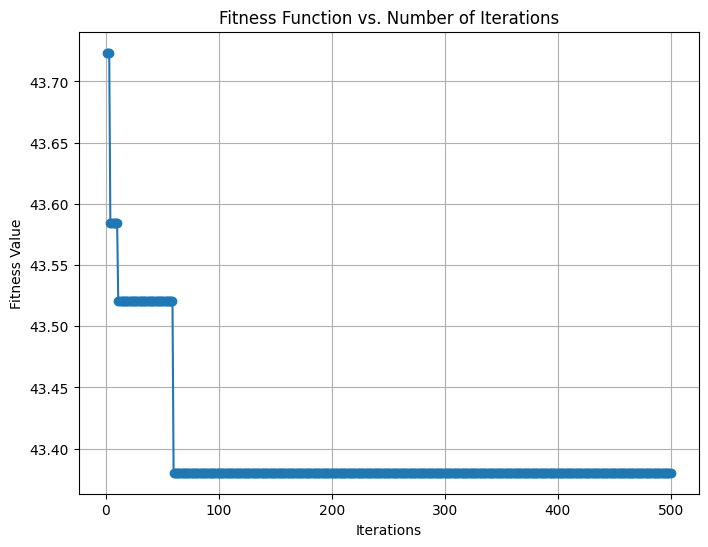

Best fitness for BCO: 43.38038010869759
Cluster 1 - Top 10 Words:
['lead', 'release', 'base', 'accord', 'history', 'love', 'marry', 'successful', 'english', 'street']

Cluster 1 - Top 10 Titles:
['Unfinished_portrait_of_Franklin_D._Roosevelt', 'Coachella_Valley_Music_and_Arts_Festival', 'Memorial_Day', 'Leap_year', 'Michael_J._Fox', 'Doctor_Strange', 'Syria', 'Sukhoi_Su-24', 'Mario_Miranda', 'Pablo_Escobar']

-----------------------------

Cluster 2 - Top 10 Words:
['family', 'million', 'attend', 'believe', 'close', 'perform', 'total', 'career', 'refer', 'local']

Cluster 2 - Top 10 Titles:
['Lisa_Brennan-Jobs', 'Meldonium', 'Kobe_Bryant', 'Jessica_Jones_(TV_series)', '2016_in_film', 'Emilia_Clarke', 'Andrew_Jackson', 'Martin_Luther_King,_Jr.', '73rd Golden Globe Awards', 'Rob_Ford']

-----------------------------

Cluster 3 - Top 10 Words:
['article', 'week', 'final', 'break', 'leave', 'character', 'team', 'reveal', 'single', 'music']

Cluster 3 - Top 10 Titles:
['David_Bowie', 'Terry

In [ ]:
def print_top_words_titles_per_cluster(assignments, titles, dictionary, top_n=10):
    for cluster_id in range(len(np.unique(assignments))):
        cluster_indices = np.where(assignments == cluster_id)[0]

        cluster_words = dictionary.iloc[cluster_indices]
        top_words = cluster_words.iloc[:top_n, 0].tolist()

        cluster_titles = titles.iloc[cluster_indices]
        top_titles = cluster_titles.iloc[:top_n, 0].tolist()

        print(f"Cluster {cluster_id + 1} - Top {top_n} Words:")
        print(top_words)
        print(f"\nCluster {cluster_id + 1} - Top {top_n} Titles:")
        print(top_titles)
        print("\n-----------------------------\n")

def fitness(solution, data):
    centroids = []
    for i in range(10):
        indices = np.where(solution == i)[0]
        indices = indices[indices < data.shape[0]]
        if len(indices) > 0:
            centroids.append(data[indices].mean(axis=0))
        else:
            centroids.append(np.zeros(data.shape[1]))

    distances = [np.linalg.norm(data - centroid, axis=1) for centroid in centroids]
    total_distance = sum(np.min(distances, axis=0))
    return total_distance

def bee_colony_clustering(fitness, data, n_scouts, n_iterations, limit):
    n_employed = n_scouts // 2
    n_onlooker = n_scouts - n_employed

    best_solution = None
    best_fitness = float('inf')
    fitness_progress = []

    for iteration in range(n_iterations):
        solutions = np.random.randint(0, 10, (n_employed, data.shape[1]))
        fitness_values = [fitness(sol, data) for sol in solutions]

        for _ in range(n_onlooker):
            idx = np.random.randint(0, n_employed)
            new_solution = solutions[idx].copy()

            index_to_change = np.random.randint(0, len(new_solution))
            new_solution[index_to_change] = np.random.randint(0, 10)

            new_fitness = fitness(new_solution, data)
            if new_fitness < fitness_values[idx]:
                solutions[idx] = new_solution
                fitness_values[idx] = new_fitness

        if min(fitness_values) < best_fitness:
            best_solution = solutions[np.argmin(fitness_values)]
            best_fitness = min(fitness_values)

        if min(fitness_values) > limit:
            solutions = np.random.randint(0, 10, (n_employed, data.shape[1]))

        fitness_progress.append(best_fitness)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, n_iterations + 1), fitness_progress, marker='o', linestyle='-')
    plt.title('Fitness Function vs. Number of Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness Value')
    plt.grid(True)
    plt.show()

    return best_solution, best_fitness

n_scouts = 20
n_iterations = 500
limit = 100
best_solution, best_fitness = bee_colony_clustering(fitness, histograms.T, n_scouts, n_iterations, limit)

aligned_solution = np.eye(10)[best_solution.astype(int)]
aligned_solution = aligned_solution.T

print(f'Best fitness for BCO: {best_fitness}')
clusters = np.argmax(aligned_solution @ histograms, axis=0)
print_top_words_titles_per_cluster(clusters, titles, dictionary, top_n=10)
